# **ANALYSIS AI JOBS**

----
# Business Case

1.  Bagaimana rata-rata gaji untuk pekerjaan AI bervariasi di setiap lokasi (Location) dan industri (Industry) yang berbeda? Apakah ada kombinasi lokasi dan industri tertentu yang secara signifikan menawarkan gaji lebih tinggi daripada yang lain?

2. Berdasarkan dataset ini, keahlian (Required_Skills) apa yang paling sering muncul dalam pekerjaan dengan proyeksi pertumbuhan tinggi (Job_Growth_Projection = 'Growth')? Informasi ini dapat digunakan untuk mengidentifikasi keterampilan yang harus diprioritaskan dalam program pelatihan atau rekrutmen.

3. Bagaimana ukuran perusahaan (Company_Size) dan tingkat adopsi AI (AI_Adoption_Level) memengaruhi rata-rata gaji dan proyeksi pertumbuhan pekerjaan? Apakah perusahaan besar dengan adopsi AI tinggi cenderung menawarkan gaji yang lebih kompetitif dan memiliki proyeksi pertumbuhan pekerjaan yang lebih baik?

import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load dataset 
path_data = 'ai_job_market_insights.csv'

# read data dari file
job = pd.read_csv(path_data)


job.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [3]:
job.shape

(500, 10)

overview dataset

In [4]:
# set pandas max columns jumlah kolom dari data
pd.set_option('display.max_columns', len(job.columns))
pd.set_option('display.max_rows', 101)

# menampilkan 100 data teratas
job.head(101)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
5,UX Designer,Education,Large,San Francisco,Medium,Medium,Cybersecurity,102825.007867,No,Growth
6,HR Manager,Finance,Medium,Singapore,Low,High,Sales,102065.720673,Yes,Growth
7,Cybersecurity Analyst,Technology,Small,Dubai,Medium,Low,Machine Learning,86607.317618,Yes,Decline
8,AI Researcher,Retail,Large,London,High,Low,JavaScript,75015.860846,No,Stable
9,Sales Manager,Entertainment,Medium,Singapore,High,Low,Cybersecurity,96834.578295,Yes,Decline


In [5]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [6]:
# melihat statistik data
job.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [7]:
# melihat statistik data object
job.describe(include="object")

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Remote_Friendly,Job_Growth_Projection
count,500,500,500,500,500,500,500,500,500
unique,10,10,3,10,3,3,10,2,3
top,Data Scientist,Manufacturing,Small,San Francisco,Medium,Medium,Project Management,Yes,Growth
freq,62,58,171,62,179,173,60,251,169


overall sudah aman

# Data Processing And Cleaning

In [8]:
import copy

In [9]:
columns_yang_digunakan = [ 'Salary_USD', 'Location', 'Industry', 'AI_Adoption_Level',
                         'Required_Skills', 'Job_Growth_Projection', 'Company_Size'
                         
]

# copy data agar tidak bertimpangan
job = job.copy()
job_used = job[columns_yang_digunakan]

job_used.head()

,Salary_USD,Location,Industry,AI_Adoption_Level,Required_Skills,Job_Growth_Projection,Company_Size
0,111392.165243,Dubai,Entertainment,Medium,UX/UI Design,Growth,Small
1,93792.562466,Singapore,Technology,Medium,Marketing,Decline,Large
2,107170.263069,Singapore,Technology,Medium,UX/UI Design,Growth,Large
3,93027.953758,Berlin,Retail,Low,Project Management,Growth,Small
4,87752.922171,Tokyo,Entertainment,Low,JavaScript,Decline,Small


In [10]:
# info columns
job_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary_USD             500 non-null    float64
 1   Location               500 non-null    object 
 2   Industry               500 non-null    object 
 3   AI_Adoption_Level      500 non-null    object 
 4   Required_Skills        500 non-null    object 
 5   Job_Growth_Projection  500 non-null    object 
 6   Company_Size           500 non-null    object 
dtypes: float64(1), object(6)
memory usage: 27.5+ KB


berdasarkan info tersebut kolom sudah sesuai dengan representasi tipe data

---

# Handle Missing Values

mengecek jumlah missing values sehingga kita dapat menentukan metode apa yang digunakana untuk menangani missing values

In [11]:
nan_col = job_used.isna().sum().sort_values(ascending=False)

nan_col

Salary_USD               0
Location                 0
Industry                 0
AI_Adoption_Level        0
Required_Skills          0
Job_Growth_Projection    0
Company_Size             0
dtype: int64

In [12]:
# melihat presentase missing values tiap kolom
n_data = len(job)

percent_nan_col = (nan_col/n_data) * 100
percent_nan_col



Salary_USD               0.0
Location                 0.0
Industry                 0.0
AI_Adoption_Level        0.0
Required_Skills          0.0
Job_Growth_Projection    0.0
Company_Size             0.0
dtype: float64

data sudah aman dan bersih dari missing values

# Pengecekan Data Duplikat

In [13]:
job_used[job_used.duplicated()]

,Salary_USD,Location,Industry,AI_Adoption_Level,Required_Skills,Job_Growth_Projection,Company_Size


data sudah aman dan bersih dari duplikat

# Pengecekan Outlier

pengecekan data kategorik

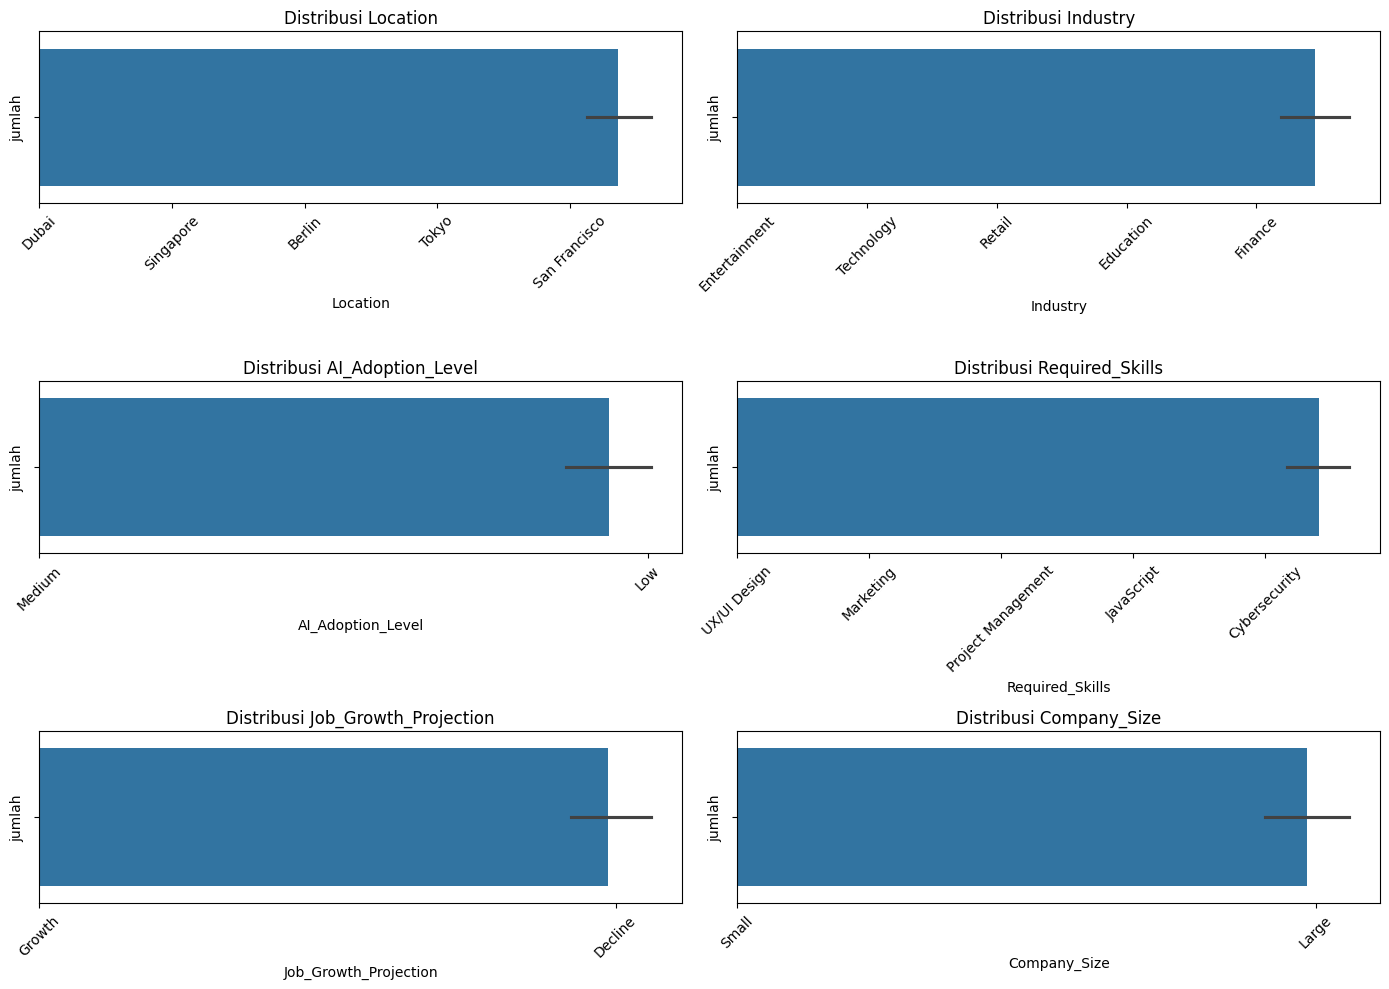

In [14]:
kategorik_colums = ['Location', 'Industry', 'AI_Adoption_Level',
                         'Required_Skills', 'Job_Growth_Projection', 'Company_Size']

nrows = 3
ncols = 2

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (14, 10))

for i, kolom in enumerate (kategorik_colums):
 
 # Hitung posisi baris dan dan kolom untuk setiap subplot
 row_pos = i // ncols
 col_pos = i % ncols
 
 # pilih Axis yang benar dari array 2D
 current_ax = axes[row_pos, col_pos]
 
 # plot data ke axis yang dipilih 
 sns.barplot(x=kolom, data=job, ax=current_ax )
 current_ax.set_title(f"Distribusi {kolom}")
 current_ax.set_xlabel(kolom)
 current_ax.set_ylabel("jumlah")
 current_ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
 
 

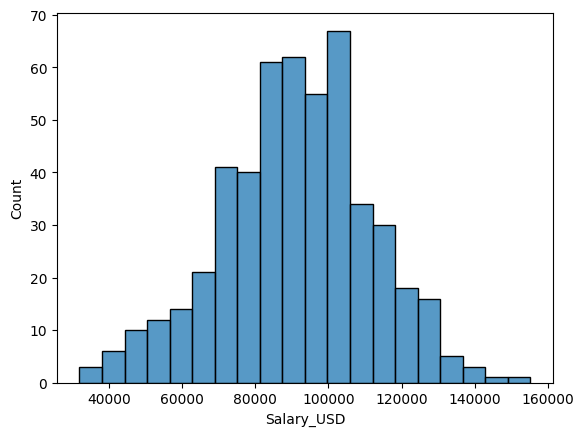

In [15]:
# plot kolom numeric
sns.histplot(data=job, x='Salary_USD')

plt.show()

In [21]:
job["Salary_USD"].describe()

count       500.000000
mean      91222.390974
std       20504.291453
min       31969.526346
25%       78511.514863
50%       91998.195286
75%      103971.282092
max      155209.821614
Name: Salary_USD, dtype: float64

outlier clear

# Analysis

# 1. rata rata Gaji

In [29]:
# menggabungkan lokasi, industry dan salary
avg_salary = job.groupby(['Location', 'Industry', ])['Salary_USD'].mean().reset_index()

In [ ]:
# urutkan gaji dari yang terbesar ke yang terendah
sorted_avg_salary = avg_salary.sort_values(by='Salary_USD', ascending = False)
print("Rata-Rata gaji diurutkan dari yang tertinggi :")
print(sorted_avg_salary)

Rata-Rata gaji diurutkan dari yang tertinggi :
         Location            Industry     Salary_USD
84          Tokyo          Healthcare  118601.675895
94        Toronto          Healthcare  117188.228399
52  San Francisco       Entertainment  112637.780873
6          Berlin              Retail  111074.616793
33       New York             Finance  110927.026227
73         Sydney             Finance  107504.161411
61      Singapore              Energy  105436.668832
77         Sydney          Technology  104001.602316
22         London       Entertainment  103588.080233
80          Tokyo           Education  102782.442009
70         Sydney           Education  101947.745404
13          Dubai             Finance  100609.508985
46          Paris              Retail  100316.943908
68      Singapore  Telecommunications   99764.856245
49          Paris      Transportation   99470.074557
32       New York       Entertainment   99253.547806
23         London             Finance   99098.815281

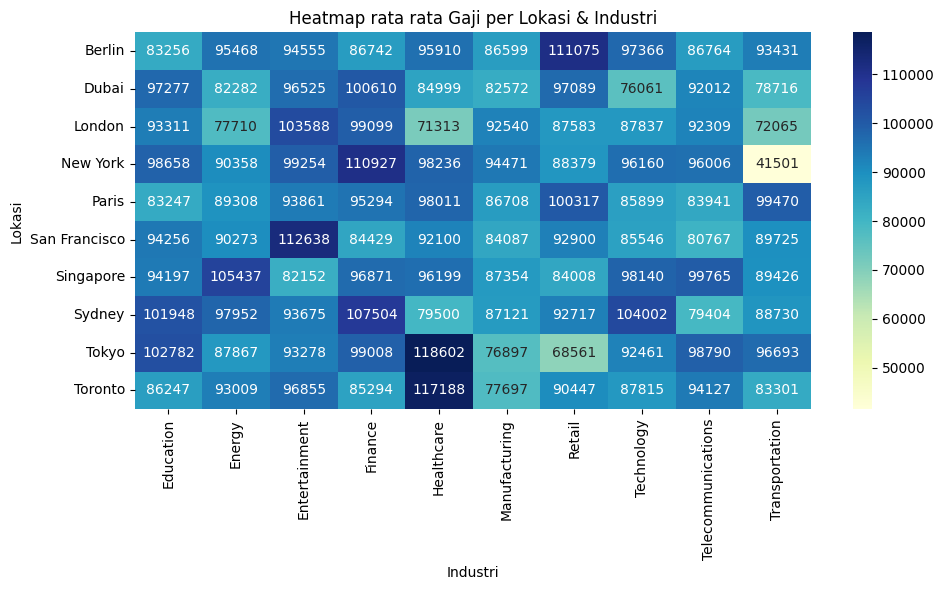

In [27]:
# buat heatmap visualisasi 

# mengubah data menjadi table pivot untuk heatmap
pivot_table_salary = job.pivot_table(
      values  = 'Salary_USD',
      index   = 'Location',
      columns = 'Industry',
      aggfunc = 'mean',
)

# heatmap visualisasi
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_salary, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap rata rata Gaji per Lokasi & Industri")
plt.xlabel('Industri')
plt.ylabel('Lokasi')
plt.tight_layout()
plt.show()

In [30]:
# menggabungkan lokasi, industry dan salary
avg_salary = job.groupby(['Location', 'Industry', ])['Salary_USD'].mean()
print(avg_salary)

Location       Industry          
Berlin         Education              83256.009197
               Energy                 95468.192528
               Entertainment          94555.125301
               Finance                86742.408451
               Healthcare             95910.147662
               Manufacturing          86598.893714
               Retail                111074.616793
               Technology             97365.617825
               Telecommunications     86763.791801
               Transportation         93430.759013
Dubai          Education              97277.310206
               Energy                 82282.026892
               Entertainment          96524.615796
               Finance               100609.508985
               Healthcare             84998.730777
               Manufacturing          82572.100372
               Retail                 97089.337150
               Technology             76060.638813
               Telecommunications     92012.0311

Kesimpulan: 

Rata Rata Gaji

- Berlin industri paling menguntungkan adalah Retail dengan rata rata sebesar $111 ribu
- Dubai indsutri paling menguntungkan adalah Finance dengan rata rata sebesar $100 ribu
- London indsutri paling menguntungkan adalah entertaiment dengan rata rata sebesar $100 ribu

Industri dan lokasi yang dengan gaji yang terbesar:

- Tokyo dengan industri Healthcare

# 2. apa yang paling sering atau paling banyak bekerja di perusahaan

In [31]:
growing_job = job[job['Job_Growth_Projection'] == 'Growth'].copy()

In [32]:
all_skill = growing_job['Required_Skills'].str.split(', ').explode()

In [35]:
top_skills = all_skill.value_counts()
print("Top 10 keahlian paling sering muncul di pekerjaan dengan proyeksi pekerjaan paling tinggi ")
print(top_skills.head(10))

Top 10 keahlian paling sering muncul di pekerjaan dengan proyeksi pekerjaan paling tinggi 
Required_Skills
Machine Learning      24
UX/UI Design          21
Project Management    21
Cybersecurity         20
Python                18
Sales                 16
Data Analysis         16
JavaScript            14
Marketing             11
Communication          8
Name: count, dtype: int64


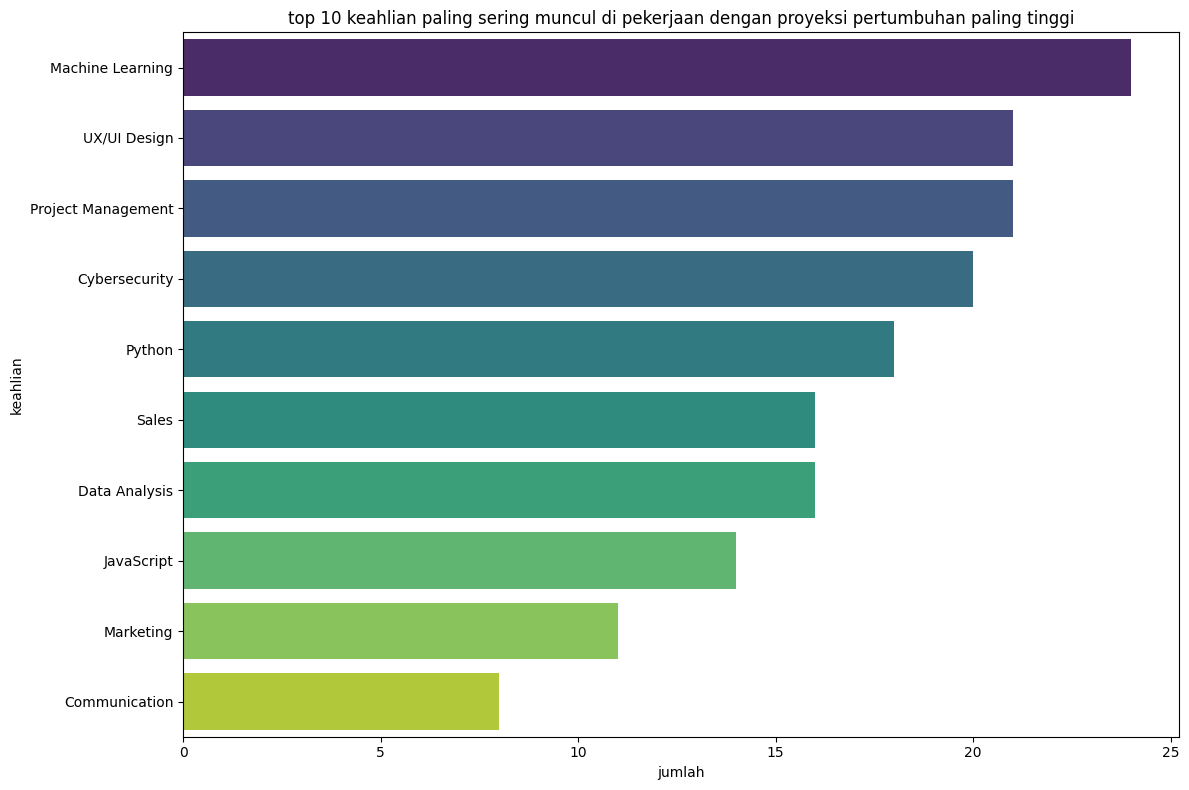

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x=top_skills.head(10).values, y=top_skills.head(10).index, orient='h', palette='viridis')
plt.title("top 10 keahlian paling sering muncul di pekerjaan dengan proyeksi pertumbuhan paling tinggi")
plt.xlabel('jumlah')
plt.ylabel('keahlian')
plt.tight_layout()
plt.show()

kesimpulan: 

Machine learning menempati urutan pertama dengan potensi growth paling tinggi

# 3. Bagaimana ukuran perusahaan dan tingkat adopsi AI memengaruhi gaji serta proyeksi pertumbuhan pekerjaan

In [40]:
# analisis pengaruh pada Rata-Rata Gaji
avg_salary_by_company = job.groupby(['Company_Size', 'AI_Adoption_Level'])['Salary_USD'].mean().reset_index()
print("Rata-rata Gaji berdasarkan Ukuran Perusahaan dan Tingkat Adopsi AI:")
print(avg_salary_by_company)

Rata-rata Gaji berdasarkan Ukuran Perusahaan dan Tingkat Adopsi AI:
  Company_Size AI_Adoption_Level    Salary_USD
0        Large              High  87318.715401
1        Large               Low  92892.981567
2        Large            Medium  91076.629215
3       Medium              High  84438.783913
4       Medium               Low  94162.784719
5       Medium            Medium  92004.559230
6        Small              High  90075.077524
7        Small               Low  92938.555365
8        Small            Medium  93567.636124


In [44]:
# Analisis pengaruh pada Proyeksi Pertumbuhan Pekerjaan
# Hitung Frekuensi setiap job_Growth_projection untuk setiap kombinasi
growth_by_company = job.groupby(['Company_Size', 'AI_Adoption_Level'])['Job_Growth_Projection'].value_counts().unstack(fill_value=0)
print("\nDistribusi Proyeksi Pertumbuhan Pekerjaan")
print(growth_by_company)


Distribusi Proyeksi Pertumbuhan Pekerjaan
Job_Growth_Projection           Decline  Growth  Stable
Company_Size AI_Adoption_Level                         
Large        High                    16      16      15
             Low                     12      21      21
             Medium                  19      22      24
Medium       High                    15      11      16
             Low                     20      15      26
             Medium                  22      21      17
Small        High                    24      19      15
             Low                     20      25      14
             Medium                  21      19      14


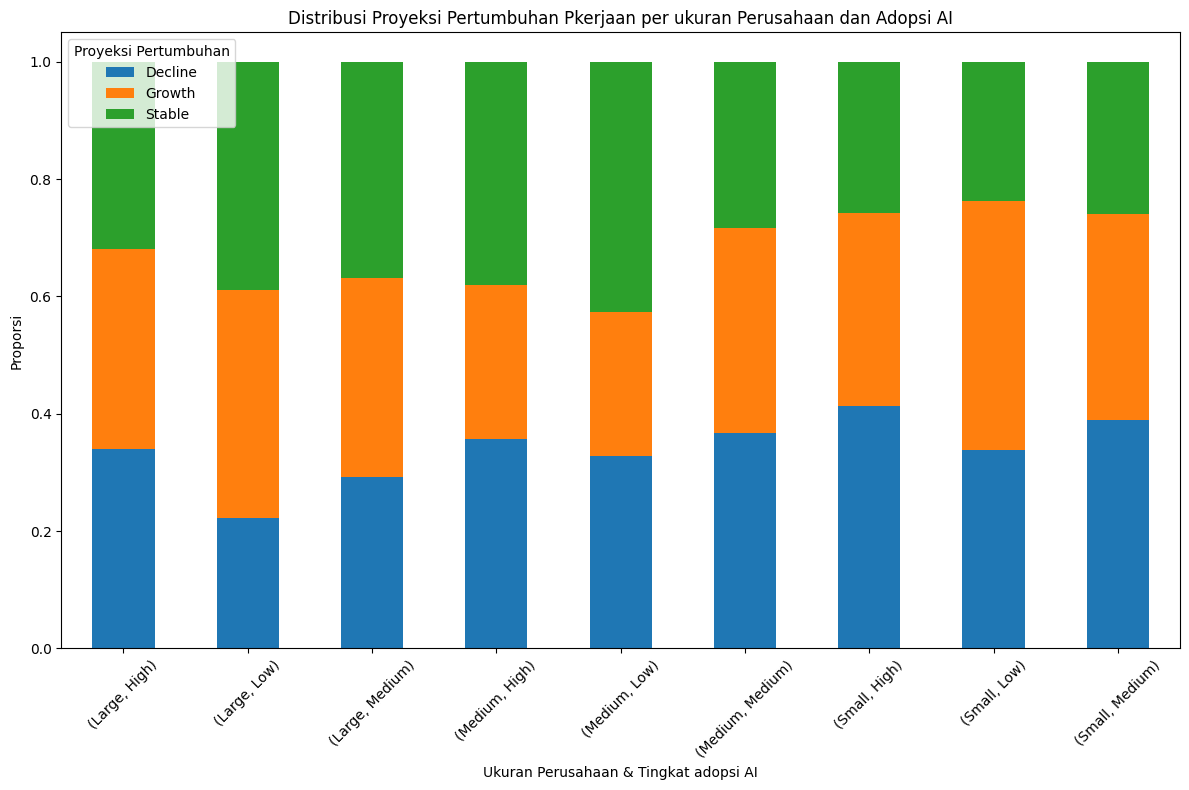

In [47]:
# Visualisasi distribui proyeksi pertumbuhan
growth_by_company_normalized = growth_by_company.div(growth_by_company.sum(axis=1), axis=0)
growth_by_company_normalized.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribusi Proyeksi Pertumbuhan Pkerjaan per ukuran Perusahaan dan Adopsi AI')
plt.xlabel('Ukuran Perusahaan & Tingkat adopsi AI')
plt.ylabel('Proporsi')
plt.xticks(rotation = 45)
plt.legend(title='Proyeksi Pertumbuhan', loc ='upper left')
plt.tight_layout()
plt.show()